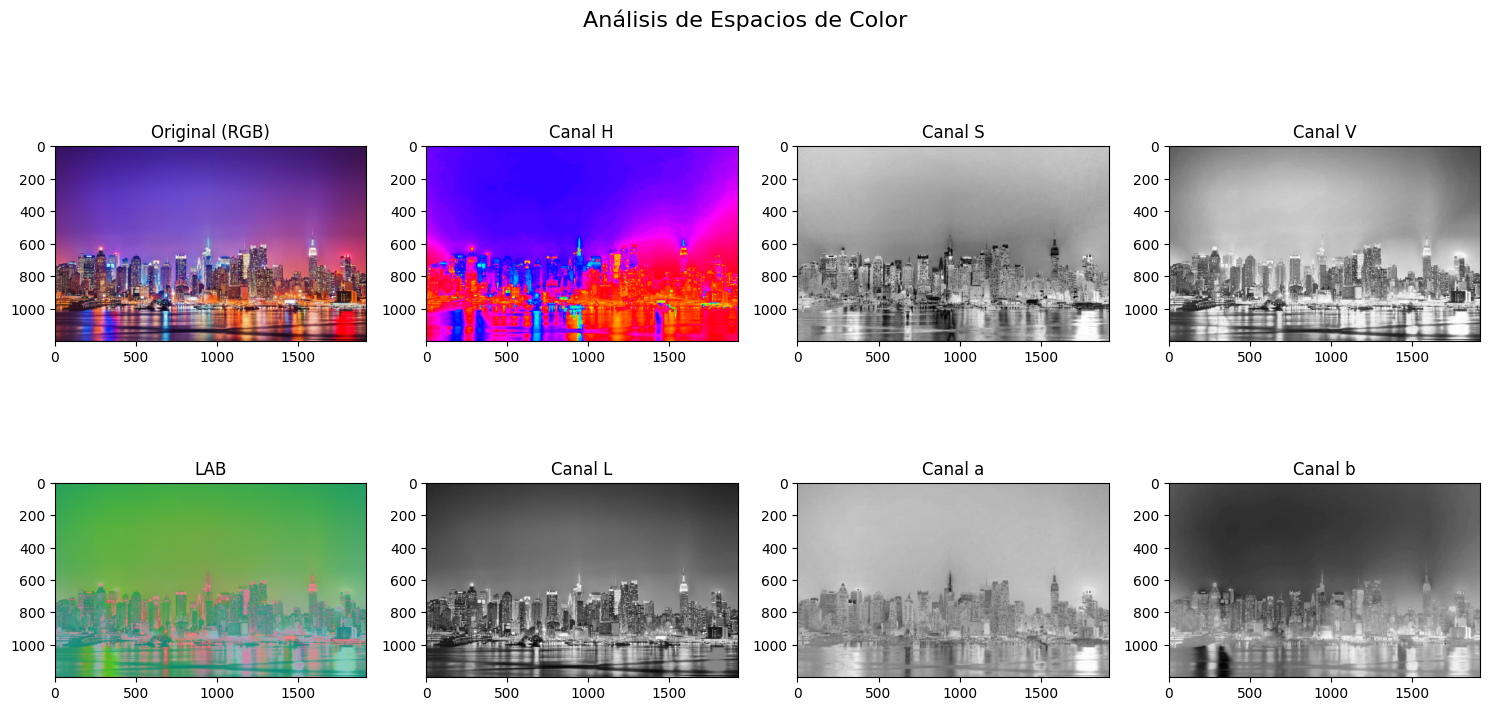

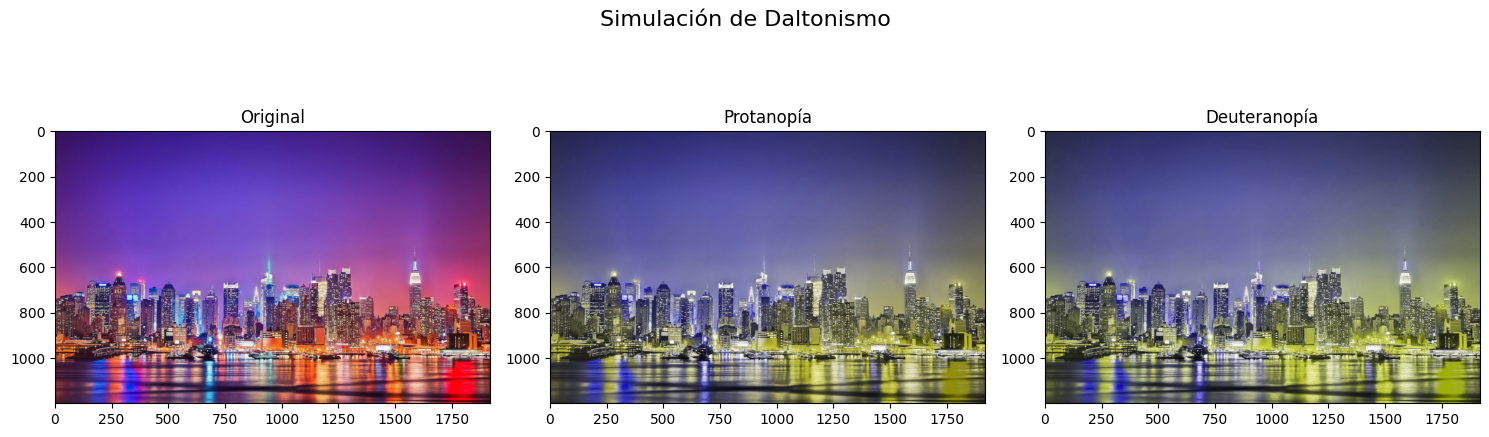

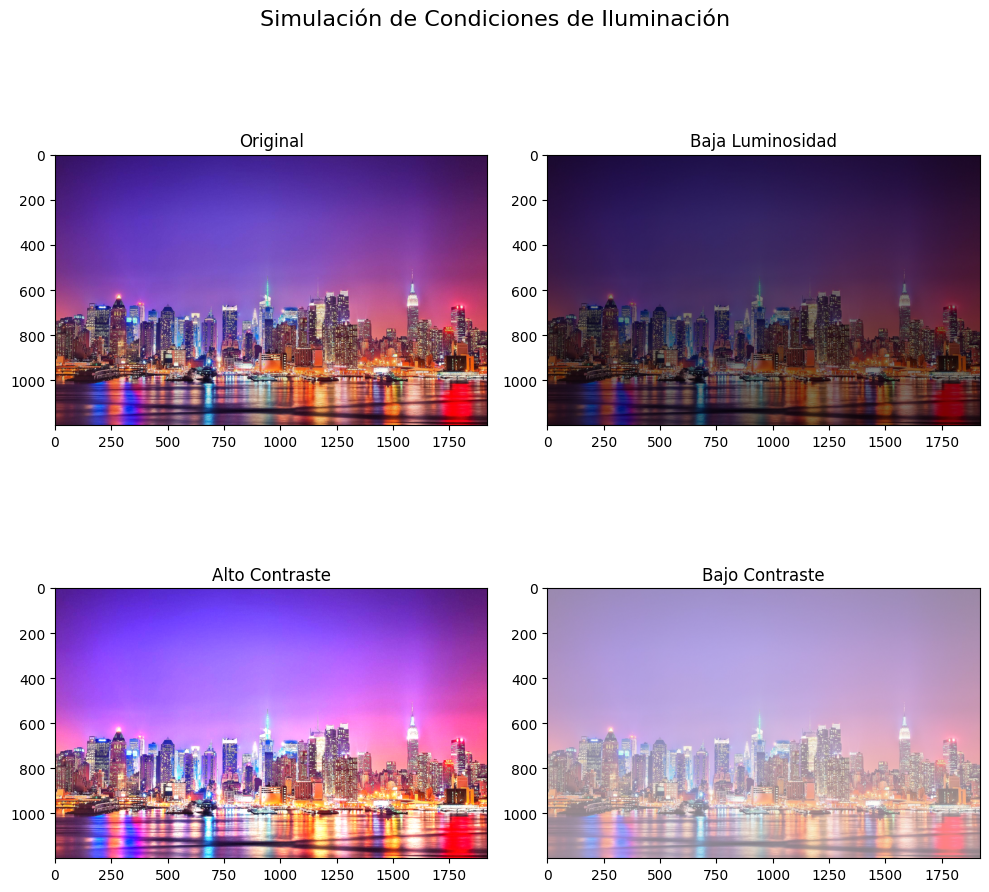

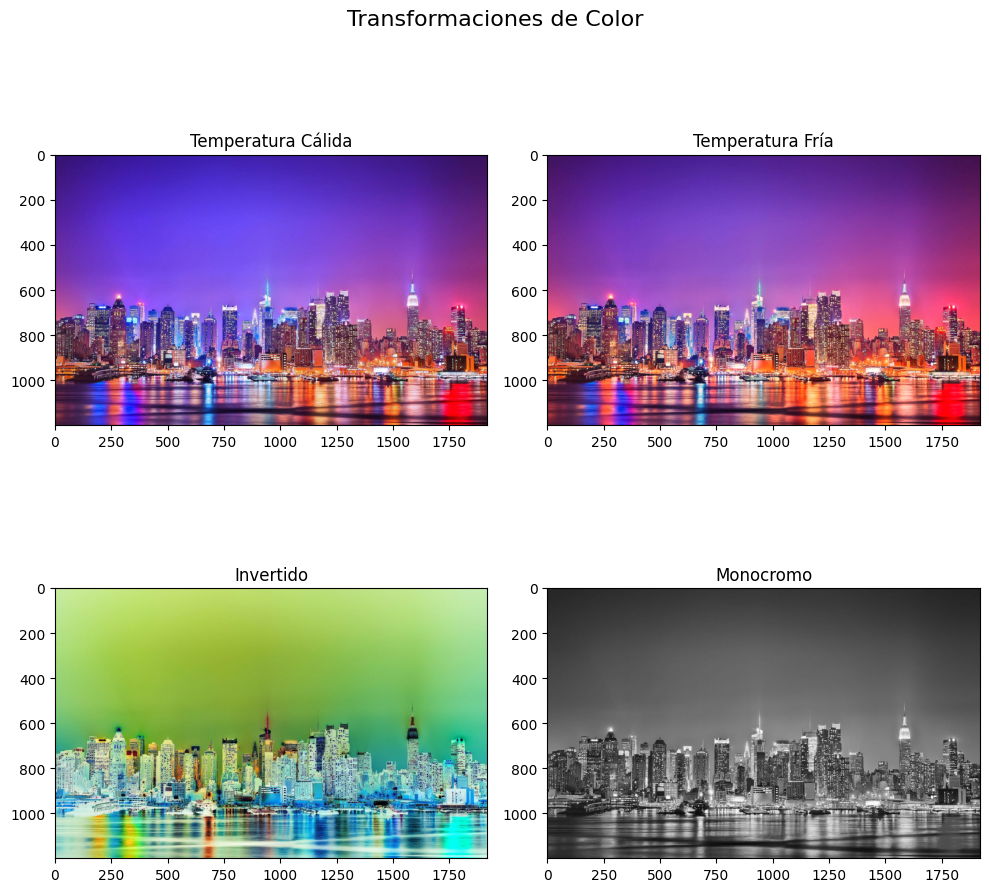

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import colorsys

class ColorSpaceAnalyzer:
    def __init__(self, image_path):
        self.original = cv2.imread(image_path)
        self.original = cv2.cvtColor(self.original, cv2.COLOR_BGR2RGB)
        
    def show_color_spaces(self):
        # Conversión a HSV
        hsv = cv2.cvtColor(self.original, cv2.COLOR_RGB2HSV)
        h, s, v = cv2.split(hsv)
        
        # Conversión a LAB
        lab = cv2.cvtColor(self.original, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        
        # Visualización
        fig, axes = plt.subplots(2, 4, figsize=(15, 8))
        fig.suptitle('Análisis de Espacios de Color', fontsize=16)
        
        # RGB
        axes[0,0].imshow(self.original)
        axes[0,0].set_title('Original (RGB)')
        
        # HSV
        axes[0,1].imshow(h, cmap='hsv')
        axes[0,1].set_title('Canal H')
        axes[0,2].imshow(s, cmap='gray')
        axes[0,2].set_title('Canal S')
        axes[0,3].imshow(v, cmap='gray')
        axes[0,3].set_title('Canal V')
        
        # LAB
        axes[1,0].imshow(lab)
        axes[1,0].set_title('LAB')
        axes[1,1].imshow(l, cmap='gray')
        axes[1,1].set_title('Canal L')
        axes[1,2].imshow(a, cmap='gray')
        axes[1,2].set_title('Canal a')
        axes[1,3].imshow(b, cmap='gray')
        axes[1,3].set_title('Canal b')
        
        plt.tight_layout()
        plt.show()
        
    def simulate_color_blindness(self):
        # Matrices de simulación de daltonismo
        protanopia = np.array([[0.567, 0.433, 0],
                             [0.558, 0.442, 0],
                             [0, 0.242, 0.758]])
        
        deuteranopia = np.array([[0.625, 0.375, 0],
                               [0.7, 0.3, 0],
                               [0, 0.3, 0.7]])
        
        # Aplicar simulaciones
        img_protanopia = np.dot(self.original.reshape(-1, 3), protanopia.T).reshape(self.original.shape)
        img_deuteranopia = np.dot(self.original.reshape(-1, 3), deuteranopia.T).reshape(self.original.shape)
        
        # Visualización
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('Simulación de Daltonismo', fontsize=16)
        
        axes[0].imshow(self.original)
        axes[0].set_title('Original')
        axes[1].imshow(np.clip(img_protanopia, 0, 255).astype(np.uint8))
        axes[1].set_title('Protanopía')
        axes[2].imshow(np.clip(img_deuteranopia, 0, 255).astype(np.uint8))
        axes[2].set_title('Deuteranopía')
        
        plt.tight_layout()
        plt.show()
        
    def simulate_lighting_conditions(self):
        # Ajustes de brillo y contraste
        low_brightness = cv2.convertScaleAbs(self.original, alpha=0.5, beta=0)
        high_contrast = cv2.convertScaleAbs(self.original, alpha=1.5, beta=0)
        low_contrast = cv2.convertScaleAbs(self.original, alpha=0.5, beta=128)
        
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))
        fig.suptitle('Simulación de Condiciones de Iluminación', fontsize=16)
        
        axes[0,0].imshow(self.original)
        axes[0,0].set_title('Original')
        axes[0,1].imshow(low_brightness)
        axes[0,1].set_title('Baja Luminosidad')
        axes[1,0].imshow(high_contrast)
        axes[1,0].set_title('Alto Contraste')
        axes[1,1].imshow(low_contrast)
        axes[1,1].set_title('Bajo Contraste')
        
        plt.tight_layout()
        plt.show()
        
    def apply_color_transformations(self):
        # Temperatura de color
        warm = self.original.copy()
        warm[:,:,2] = np.clip(warm[:,:,2] * 1.2, 0, 255)  # Aumentar componente roja
        
        cool = self.original.copy()
        cool[:,:,0] = np.clip(cool[:,:,0] * 1.2, 0, 255)  # Aumentar componente azul
        
        # Inversión
        inverted = 255 - self.original
        
        # Monocromo
        gray = cv2.cvtColor(self.original, cv2.COLOR_RGB2GRAY)
        monochrome = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
        
        fig, axes = plt.subplots(2, 2, figsize=(10, 10))
        fig.suptitle('Transformaciones de Color', fontsize=16)
        
        axes[0,0].imshow(warm)
        axes[0,0].set_title('Temperatura Cálida')
        axes[0,1].imshow(cool)
        axes[0,1].set_title('Temperatura Fría')
        axes[1,0].imshow(inverted)
        axes[1,0].set_title('Invertido')
        axes[1,1].imshow(monochrome)
        axes[1,1].set_title('Monocromo')
        
        plt.tight_layout()
        plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    analyzer = ColorSpaceAnalyzer('image.jpg')
    analyzer.show_color_spaces()
    analyzer.simulate_color_blindness()
    analyzer.simulate_lighting_conditions()
    analyzer.apply_color_transformations() 